In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from matminer.datasets import load_dataset
from pymatgen.core import Composition
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

    HEA_comp  Formation_energy  Number of Elements
0     CoCuAg         -4.410681                   3
1     CoCuIr         -6.574279                   3
2     CrFeAu         -6.869858                   3
3   AlCrCuIr         -6.729235                   4
4   CoCuPtRh         -6.135278                   4
5   AlAgIrRu         -6.219915                   4
6     ZnFePt         -5.453665                   3
7   CrFeCoCu         -7.152280                   4
8   TiMoRuPt         -8.806858                   4
9   MnCoPdPt         -6.953314                   4
10    AgIrPd         -5.411146                   3
11    TaCoNi         -8.296111                   3
12    CrRuRh         -8.761536                   3
13    AlCuAu         -3.895483                   3
14  MnCoReNi         -8.578577                   4
15    FeCoIr         -8.121992                   3
16  NiOsPdPt         -6.964151                   4
17    TiCrPd         -7.682024                   3
18    NiIrAu         -5.749774 

/var/folders/7c/90tth4h53mnglfwy8ww1kng00000gp/T/ipykernel_64882/3854879226.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=elements, y=counts, palette="mako")


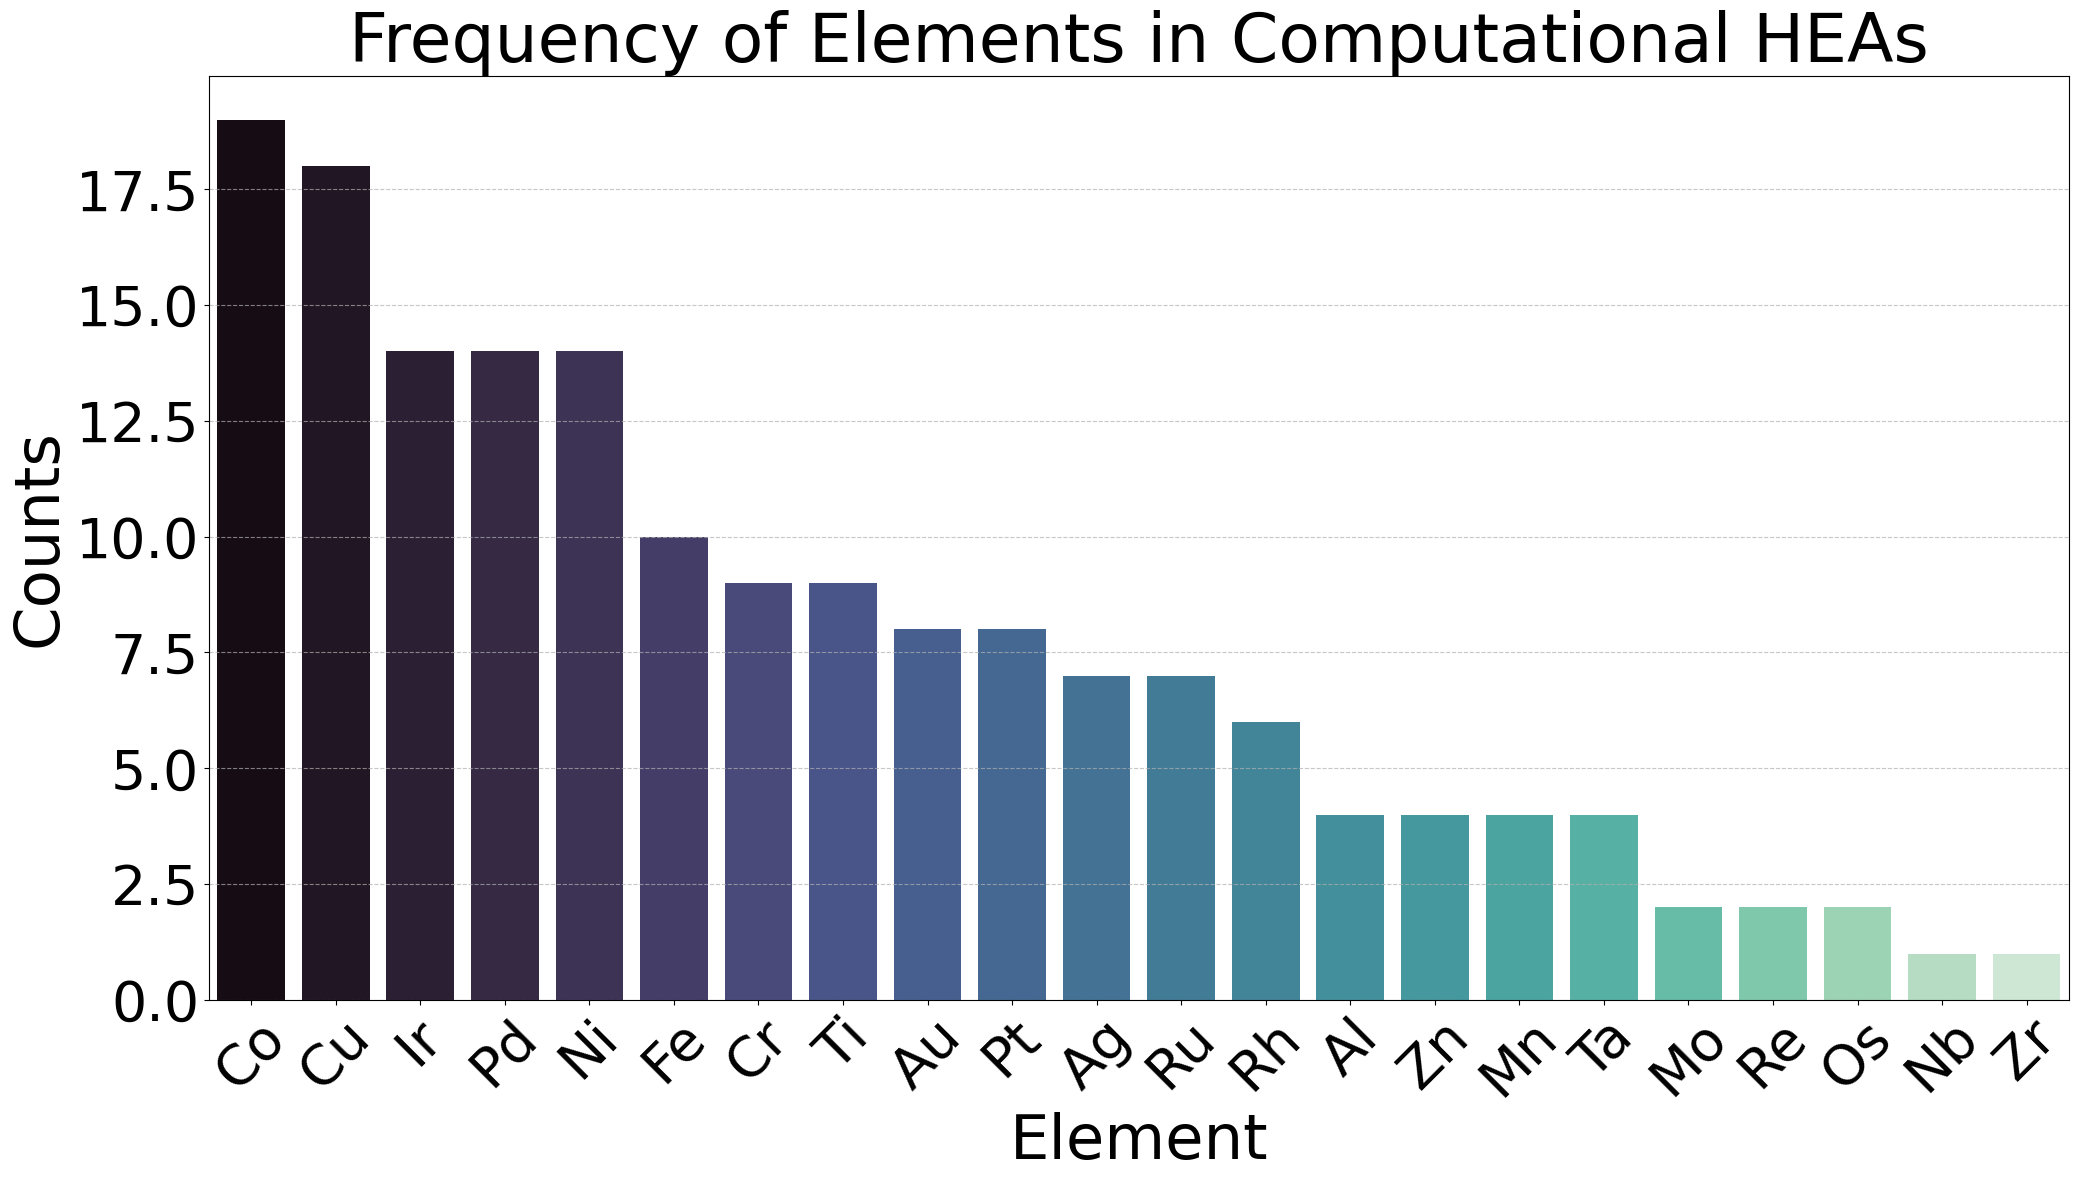

In [149]:
file_path = '/Users/ouyanglab/Documents/matthew_YSP/compu_energy.xlsx' #change exp_energy to comp_energy to switch
df = pd.read_excel(file_path)
print(df)
formulas = df["HEA_comp"]
element_counts = {}
for formula in formulas:
    composition = Composition(formula)
    elements = composition.elements
    for element in elements:
        element = str(element)
        if not element in element_counts:
            element_counts[element] = 1
        else:
            element_counts[element] +=1
    
print(element_counts)
sorted_items = sorted(element_counts.items(), key=lambda item: item[1], reverse=True)
elements = [item[0] for item in sorted_items]
counts = [item[1] for item in sorted_items]

# Create the bar graph directly using seaborn.barplot
plt.figure(figsize=(24, 12)) # Adjust figure size as needed
sns.barplot(x=elements, y=counts, palette="mako")

plt.title('Frequency of Elements in Computational HEAs', fontsize=49)
plt.xlabel('Element', fontsize=45)
plt.ylabel('Counts', fontsize=45)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Optional: add grid lines
plt.savefig('elefreq.png', dpi=600)
plt.show()


{3: 29, 4: 20}


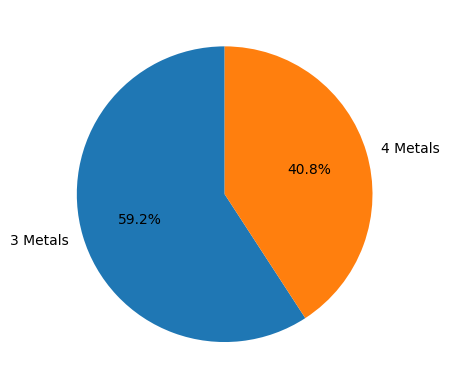

In [150]:
formulas = df["HEA_comp"]
number_of_elements_counts = {}
for formula in formulas:
    composition = Composition(formula)
    elements = composition.elements
    length = 0
    for element in elements:
        length+=1
    if not length in number_of_elements_counts:
        number_of_elements_counts[length] = 1
    else:
        number_of_elements_counts[length] += 1
number_of_elements = []
count = []
for x,y in number_of_elements_counts.items():
    number_of_elements.append(str(x) + " Metals")
    count.append(y)

plt.pie(count, labels = number_of_elements, autopct = '%1.1f%%', startangle=90)
plt.savefig('piechartofnumelements.png', dpi = 600)
print(number_of_elements_counts)

In [151]:
def formula_to_vector(formula, ele_lst):
    '''
    convert the formula into a vector
    formula: the formula of the composition,
    ele_lst: the element list, we want to use to generate the vector
    '''
    # Initialize vector of zeros
    vector = np.zeros(len(ele_lst), dtype=int)

    # Parse the formula to extract elements and their counts
    ele_dicts = Composition(formula).as_dict()
    for elem, count in ele_dicts.items():
        if elem in ele_lst:
            index = ele_lst.index(elem)
            vector[index] = int(count) if count else 1 #replace respective eles in vector with their stoichiometric composition

    return vector

In [152]:
# Initialize empty lists to collect data
X_data = []
Y_data = []

ele_lst = list(element_counts.keys())
for index, row in df.iterrows():
    formula = row['HEA_comp'] 
    formation_energy = row['Formation_energy']    
    X_data.append(formula_to_vector(formula, ele_lst))
    Y_data.append(formation_energy)

# Convert lists to numpy arrays
X_data = np.array(X_data)
Y_data = np.array(Y_data)

# Split data into training (so model can learn) and testing (so model can predict on unseen data) sets
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)

# Initialze and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

# Make predictions and evaluate the model
Y_pred = model.predict(X_test)

In [153]:
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.8521492144444439


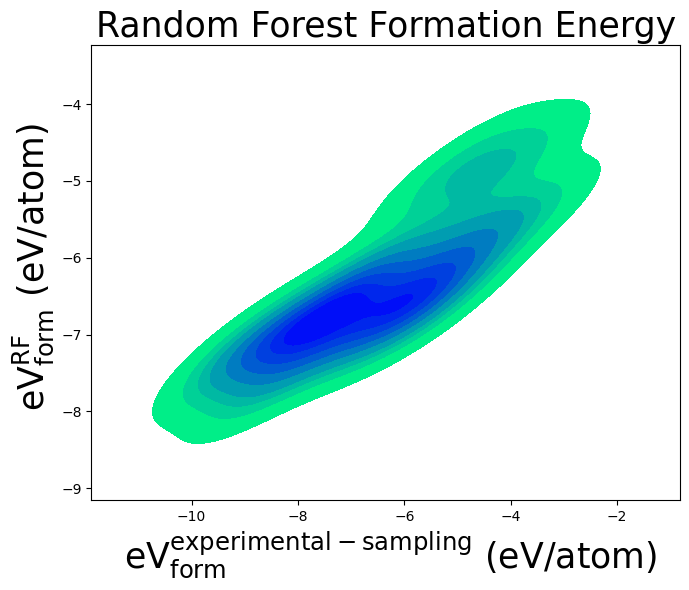

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


fig, ax = plt.subplots(figsize=(7, 6))


sns.kdeplot(x=Y_test, y=Y_pred, fill=True, cmap='winter_r', ax=ax)


ax.set_ylabel(r' eV$_{\mathrm{form}}^{\mathrm{RF}}$ (eV/atom)', fontsize=25)
ax.set_xlabel(r' eV$_{\mathrm{form}}^{\mathrm{experimental-sampling}}$ (eV/atom)', fontsize=25)
ax.set_title('Random Forest Formation Energy', fontsize=25)


plt.tight_layout()
plt.savefig('expsample_randomforest_kdeplot.png', dpi=600)
plt.show()


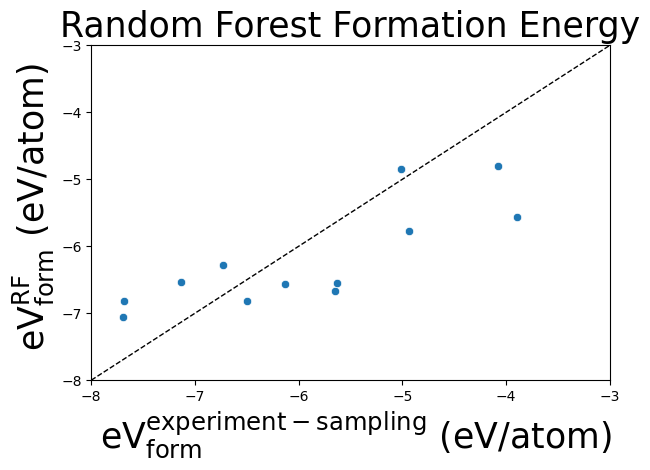

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ax = sns.scatterplot(x=Y_test, y=Y_pred)
ax.set_ylabel(r' eV$_{\mathrm{form}}^{\mathrm{RF}}$ (eV/atom)', fontsize=25)
ax.set_xlabel(r' eV$_{\mathrm{form}}^{\mathrm{experiment-sampling}}$ (eV/atom)', fontsize=25)
ax.set_title('Random Forest Formation Energy', fontsize=25) 
ax.set_xlim([-8,-3])
ax.set_ylim([-8,-3])

ax.plot([-8, -3], [-8, -3], 'k--', linewidth=1)

plt.tight_layout()
plt.savefig("expsameple_randomforest_scatterplot", dpi=600)
plt.show()


In [156]:
#suggestions
#3 or 5 elements
#Contains Ni, Co, Cu, Fe


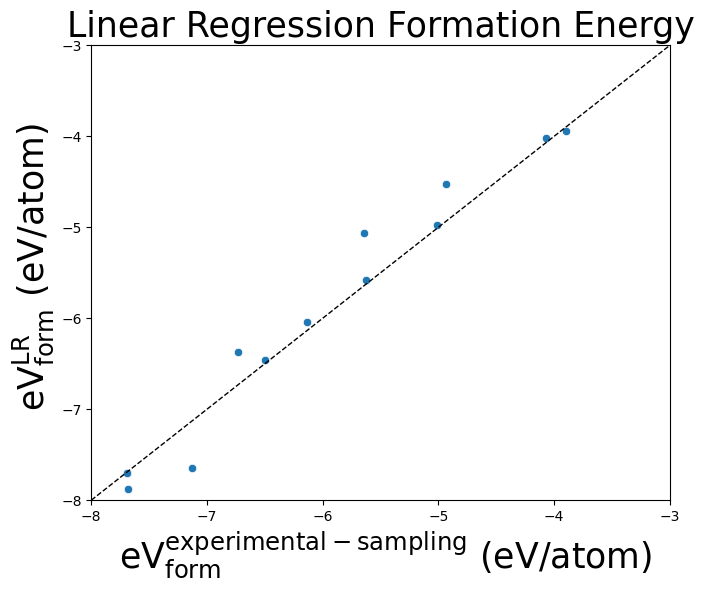

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
fig, ax = plt.subplots(figsize=(7, 6))

sns.scatterplot(x=Y_test, y=Y_pred, ax=ax)

ax.set_ylabel(r' eV$_{\mathrm{form}}^{\mathrm{LR}}$ (eV/atom)', fontsize=25)
ax.set_xlabel(r' eV$_{\mathrm{form}}^{\mathrm{experimental-sampling}}$ (eV/atom)', fontsize=25)
ax.set_title('Linear Regression Formation Energy', fontsize=25) 

ax.set_xlim([-8,-3])
ax.set_ylim([-8,-3])

ax.plot([-8, -3], [-8, -3], 'k--', linewidth=1)

plt.tight_layout()
plt.savefig("expsample_linearregression_scatterplot", dpi=600)
plt.show()


In [158]:
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.2580133128912135


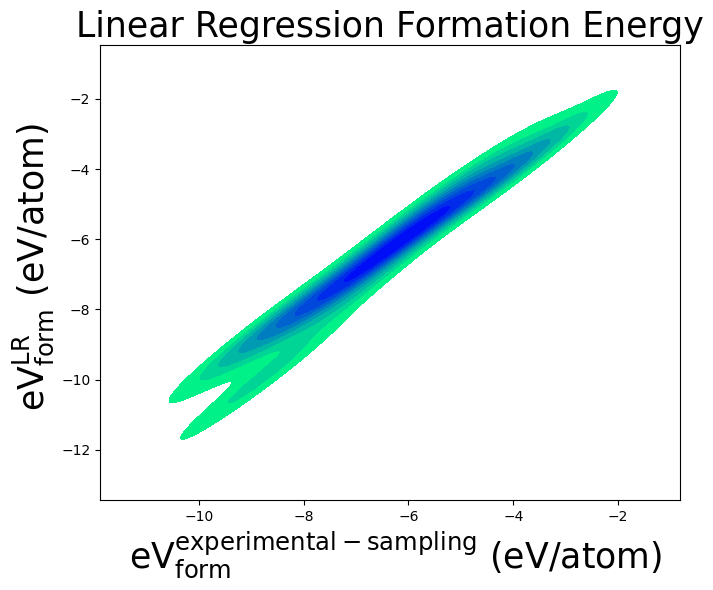

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


fig, ax = plt.subplots(figsize=(7, 6))


sns.kdeplot(x=Y_test, y=Y_pred, fill=True, cmap='winter_r', ax=ax)


ax.set_ylabel(r' eV$_{\mathrm{form}}^{\mathrm{LR}}$ (eV/atom)', fontsize=25)
ax.set_xlabel(r' eV$_{\mathrm{form}}^{\mathrm{experimental-sampling}}$ (eV/atom)', fontsize=25)
ax.set_title('Linear Regression Formation Energy', fontsize=25)


plt.tight_layout()
plt.savefig("expsample_linearregression_kdeplot", dpi=600)
plt.show()
